In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

**Importing the dataset**

In [3]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.shape

(400, 5)

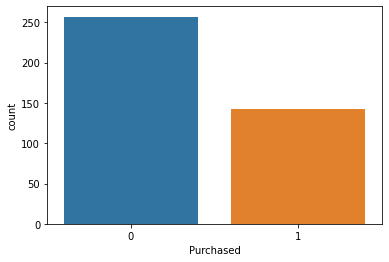

In [8]:
sns.countplot(x='Purchased',data=dataset)

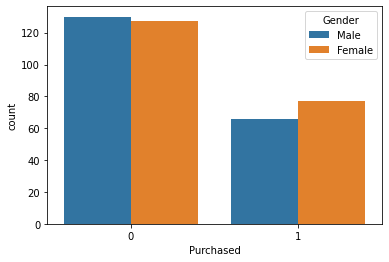

In [9]:
sns.countplot(x='Purchased',hue='Gender',data=dataset)

**Splitting the dataset into the Training set and Test set**

In [10]:
X=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33,random_state=0)

**Fitting Random Forest to the Training set**

In [16]:
model = RandomForestClassifier()

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [20]:
Accuracy = accuracy_score(y_test, y_pred)
Accuracy

0.9015151515151515

In [21]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
model1.feature_importances_

array([0.50797958, 0.49202042])

In [23]:
feature_imp = pd.Series(data=model1.feature_importances_,index=['2','3' ]).sort_values(ascending=False)
feature_imp

2    0.50798
3    0.49202
dtype: float64

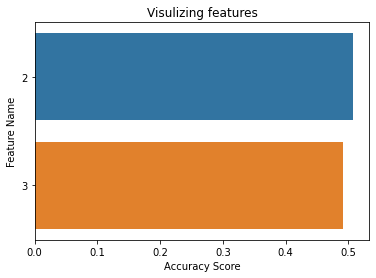

In [24]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.ylabel('Feature Name')
plt.xlabel('Accuracy Score')
plt.title('Visulizing features')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_pred)
Accuracy

0.9015151515151515

**Making the Confusion Matrix**

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(y_test,y_pred))

[[77  7]
 [ 6 42]]
